# Heart Failure

In [1]:
import zipfile
import pandas as pd
import ehrapy as ep
from anndata import AnnData
import warnings
warnings.filterwarnings("ignore")

Installed version 0.4.0 of ehrapy is newer than the latest release 0.3.0! You are running a nightly version and 
features may break!

In [2]:
pd.set_option("display.max_columns", None)

## Getting the dataset

In [3]:
!wget -nc http://archive.ics.uci.edu/ml/machine-learning-databases/00519/heart_failure_clinical_records_dataset.csv

File 'heart_failure_clinical_records_dataset.csv' already there; not retrieving.



# Data Wrangling

Since the dataset does not have a patient ID we add one.

In [4]:
data = pd.read_csv("heart_failure_clinical_records_dataset.csv",
                   sep=",")

In [5]:
data["patient_id"] = range(1, len(data) + 1)

In [6]:
data.set_index("patient_id", inplace=True)

In [7]:
data.to_csv("heart_failure_ehrapy_prepared.csv")

## ehrapy sanity check

In [8]:
adata = ep.io.read_csv("heart_failure_ehrapy_prepared.csv",
                   index_column="patient_id")

2023-01-18 19:09:00,661 - root INFO - Added all columns to `obs`.
2023-01-18 19:09:00,675 - root INFO - Transformed passed dataframe into an AnnData object with n_obs x n_vars = `299` x `13`.


In [9]:
adata.var_names

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

Quality control metrics missing. Calculating...

2023-01-18 19:09:00,836 - root INFO - Added the calculated metrics to AnnData's `obs` and `var`.


scikit-learn-intelex is not available. Install via pip install scikit-learn-intelex  for faster imputations.

2023-01-18 19:09:00,855 - root INFO - Column names for numeric variables ['age', 'platelets', 'DEATH_EVENT', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'time', 'serum_sodium', 'serum_creatinine', 'smoking', 'ejection_fraction', 'sex', 'high_blood_pressure'] were replaced.


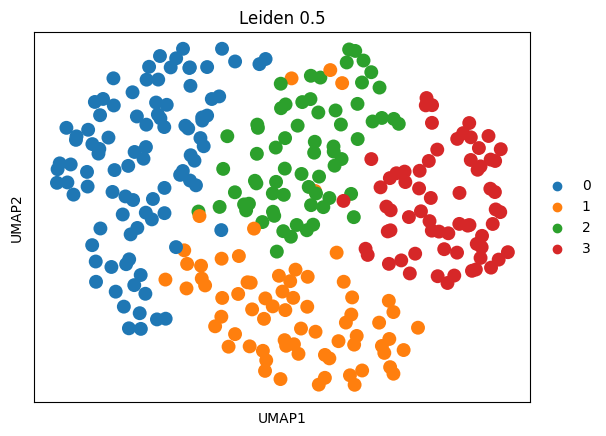

In [10]:
ep.pp.knn_impute(adata)
ep.pp.scale_norm(adata)
ep.pp.pca(adata)
ep.pp.neighbors(adata)
ep.tl.umap(adata)
ep.tl.leiden(adata, resolution=0.5, key_added="leiden_0_5")
ep.pl.umap(adata, color=["leiden_0_5"], title="Leiden 0.5")

In [11]:
adata.var_names

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

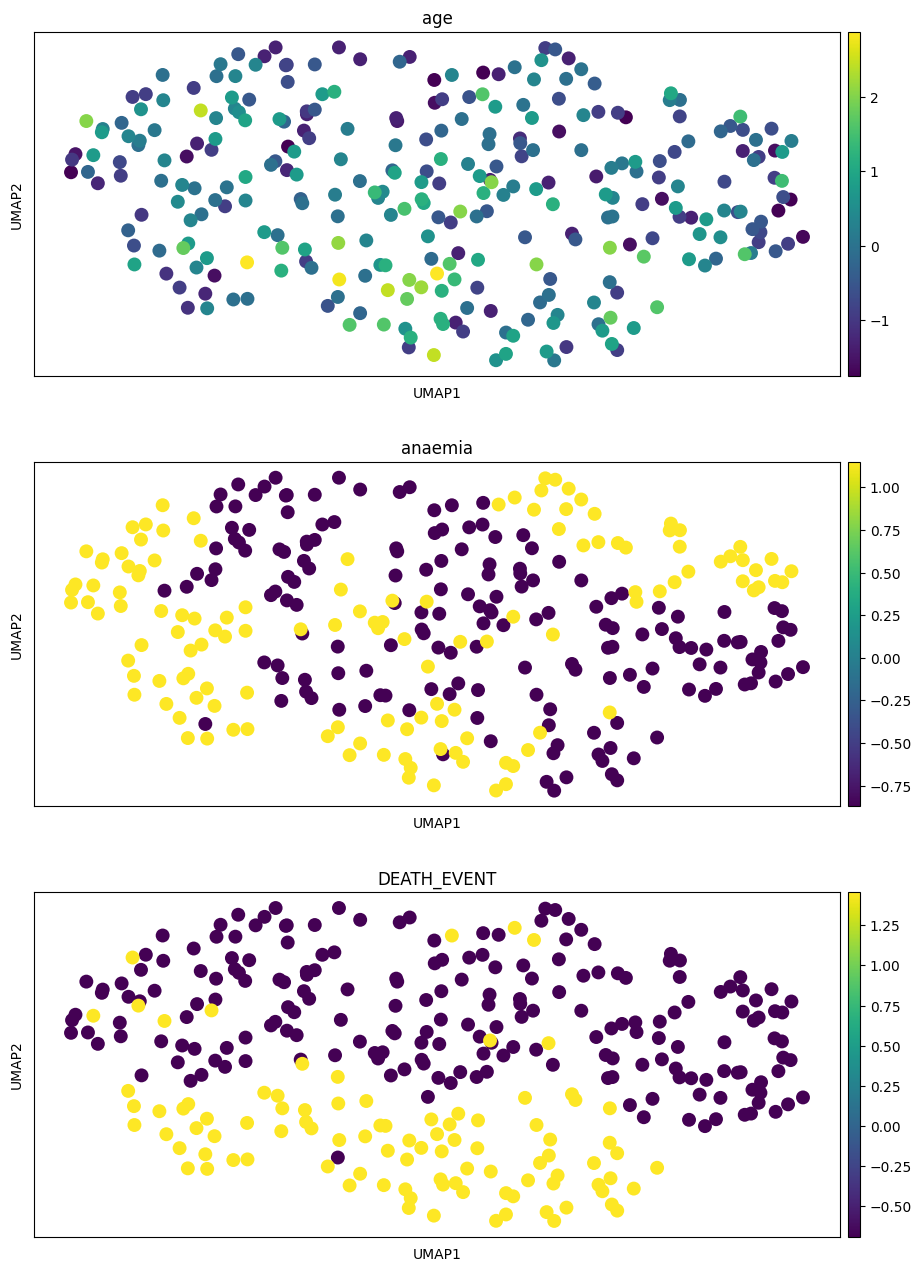

In [12]:
ep.pl.umap(adata, color=["age", "anaemia",
           "DEATH_EVENT", ], ncols=1, wspace=0.75)